In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA,TruncatedSVD,NMF
from sklearn.preprocessing import Normalizer
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
from scipy.interpolate import interp1d
import scipy
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.mode.chained_assignment = None

In [3]:
heads=pd.read_csv("/data/dharp/compounding/datasets/heads_reduced.csv",sep="\t",usecols=[0,2,3])
heads.columns=['constituent','context','count']
heads['constituent']=heads['constituent'].str.replace(r'_n$', r'_h', regex=True)
heads=heads.groupby(['constituent','context'])['count'].sum()

In [5]:
modifiers=pd.read_csv("/data/dharp/compounding/datasets/modifiers_reduced.csv",sep="\t",usecols=[0,2,3])
modifiers.columns=['constituent','context','count']
modifiers['constituent']=modifiers['constituent'].str.replace(r'_n$', r'_m', regex=True)
modifiers=modifiers.groupby(['constituent','context'])['count'].sum()

In [9]:
constituents = pd.concat([heads,modifiers])

In [10]:
constituents=constituents.to_sparse()

In [12]:
constituents, rows, columns = constituents.to_coo(row_levels=['constituent'],column_levels=['context'],sort_labels=True)

In [13]:
len(columns)

48373

In [14]:
co_occ_counts_svd = TruncatedSVD(n_components=300, n_iter=10, random_state=1991)
display(co_occ_counts_svd.fit(constituents).explained_variance_ratio_.sum())
co_occ_list=co_occ_counts_svd.fit(constituents).explained_variance_ratio_
co_occ_reduced = co_occ_counts_svd.fit_transform(constituents)
co_occ_reduced = Normalizer(copy=False).fit_transform(co_occ_reduced)
co_occ_reduced=pd.DataFrame(co_occ_reduced,index=rows)
co_occ_reduced

0.9840662562357616

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
a_h,0.441,-0.005,0.006,-0.002,0.002,-0.041,0.191,-0.010,0.005,-0.110,...,0.069,-0.068,-0.001,-0.013,-0.102,-0.053,-0.018,0.071,-0.012,-0.060
a_m,0.269,0.022,0.002,0.107,-0.006,-0.016,0.092,0.058,-0.000,-0.080,...,-0.012,0.046,0.097,0.004,0.018,0.030,-0.004,-0.082,-0.001,0.166
aa_h,0.014,0.002,-0.001,0.001,0.003,-0.010,0.072,-0.001,-0.026,0.078,...,0.007,-0.005,0.032,-0.011,-0.070,-0.041,-0.038,0.011,-0.020,0.014
aa_m,0.227,0.020,0.004,-0.005,0.050,-0.011,0.064,-0.001,-0.004,-0.063,...,-0.013,-0.046,0.038,-0.025,-0.044,-0.063,-0.033,0.018,0.014,0.048
aaa_h,0.259,-0.014,0.015,0.005,0.009,-0.013,0.130,0.166,-0.008,-0.060,...,-0.008,0.011,0.028,-0.015,-0.053,-0.015,-0.034,0.012,-0.049,0.023
aaa_m,0.077,0.050,-0.002,0.106,-0.007,-0.004,0.007,-0.002,-0.001,-0.009,...,0.006,-0.017,0.044,-0.075,-0.063,-0.010,-0.036,0.038,-0.021,-0.003
aaaa_m,0.001,0.000,0.000,0.001,0.000,-0.001,0.004,0.001,0.000,-0.006,...,0.016,-0.026,0.062,-0.043,-0.058,-0.039,-0.037,0.041,-0.025,0.026
aaaaa_h,0.001,0.000,0.000,0.001,0.000,-0.001,0.004,0.001,0.000,-0.006,...,0.016,-0.026,0.062,-0.043,-0.058,-0.039,-0.037,0.041,-0.025,0.026
aaaaa_m,0.001,0.000,0.000,0.001,0.000,-0.001,0.004,0.001,0.000,-0.006,...,0.016,-0.026,0.062,-0.043,-0.058,-0.039,-0.037,0.041,-0.025,0.026
aaai_h,0.001,0.001,0.001,0.002,0.006,0.002,0.004,0.029,0.001,-0.005,...,0.093,-0.042,0.002,0.018,0.024,-0.097,0.051,-0.123,0.078,-0.134


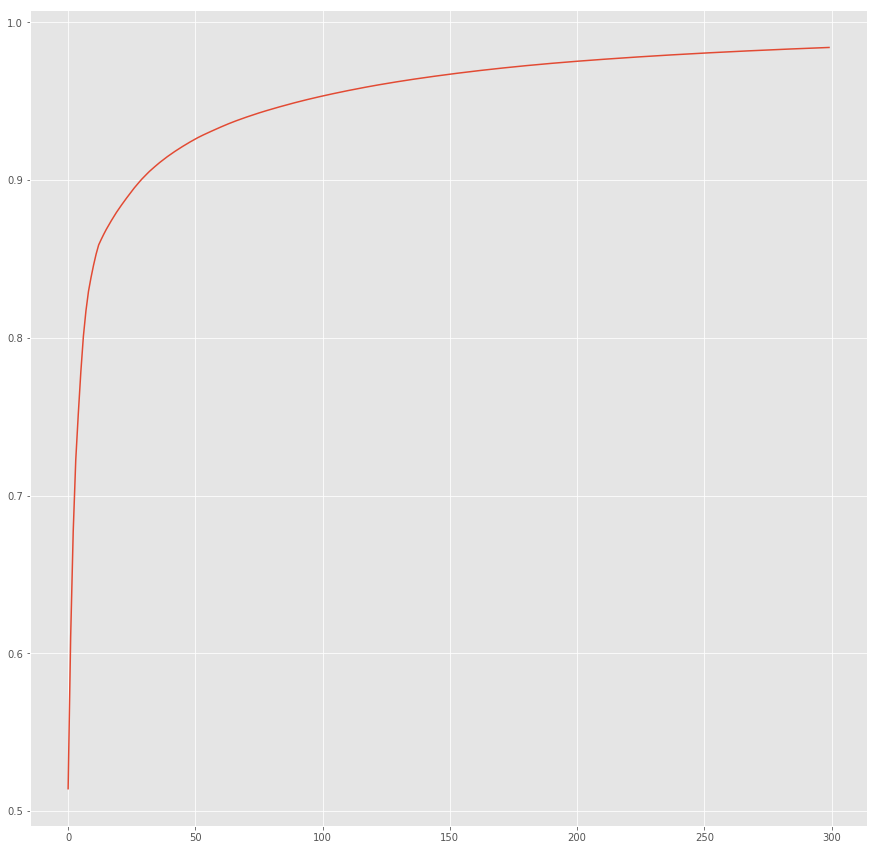

In [15]:
pd.Series(co_occ_list).cumsum().plot(figsize=[15,15])

In [16]:
co_occ_reduced.to_csv("/data/dharp/compounding/datasets/constituents_dec_agnostic_dim_reduced.csv",sep="\t",header=False)

In [17]:
constituents.mean()

1.221634462750902